In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🐼 Pandas Worksheet: Exploratory Analysis
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive




In [2]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [3]:
ratings.userId.nunique(), ratings.movieId.nunique()

(610, 9724)

#### a) What is the average rating, b) which rating appears the most?

In [4]:
ratings.rating.mean(), ratings.rating.mode()

(3.501556983616962,
 0    4.0
 Name: rating, dtype: float64)

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [5]:
ratings['rating'].loc[ratings['rating'] == 5].count() / ratings.rating.count()

0.13101471696616288

In [6]:
movie_rating_list = list()
freq_list = list()

for num in np.arange(0.5, 5.5, 0.5):

    movie_rating_list.append(num)

    freq = ratings['rating'].loc[ratings['rating'] == num].count() / ratings.rating.count()
    freq_list.append(freq)

freq_table = pd.DataFrame(freq_list)
movie_rating_table = pd.DataFrame(movie_rating_list)

freq_table = pd.concat([movie_rating_table, freq_table], axis=1)

In [7]:
freq_table.columns = ['rating', 'percentage']
freq_table.set_index('rating')

,percentage
rating,
0.5,0.013586
1.0,0.027877
1.5,0.017762
2.0,0.074884
2.5,0.055040
3.0,0.198808
3.5,0.130271
4.0,0.265957
4.5,0.084801


<AxesSubplot:>

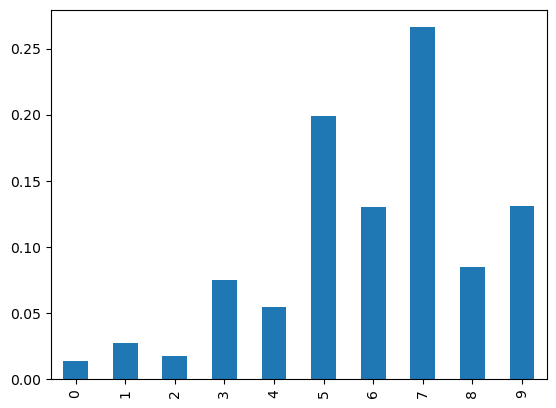

In [8]:
freq_table['percentage'].plot(kind='bar')

#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

#### How many users have rated more than 20 movies?

In [9]:
total_df = ratings.groupby('userId')[['rating']].count()
total_df

,rating
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [10]:
total_df.rating.min()

20

#### a) How many movies rated the user with the most/ least ratings? b) What is the *median* number of ratings?

- use your results from the previous question

In [11]:
total_df.loc[total_df['rating'] == total_df['rating'].max()], total_df.loc[total_df['rating'] == total_df['rating'].min()]

(        rating
 userId        
 414       2698,
         rating
 userId        
 53          20
 147         20
 189         20
 194         20
 207         20
 257         20
 278         20
 320         20
 406         20
 431         20
 442         20
 569         20
 576         20
 595         20)

In [12]:
total_df.rating.median()

70.5

#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

- use your results from the previous question
- Hint: `sns.histplot()`

<AxesSubplot:ylabel='Count'>

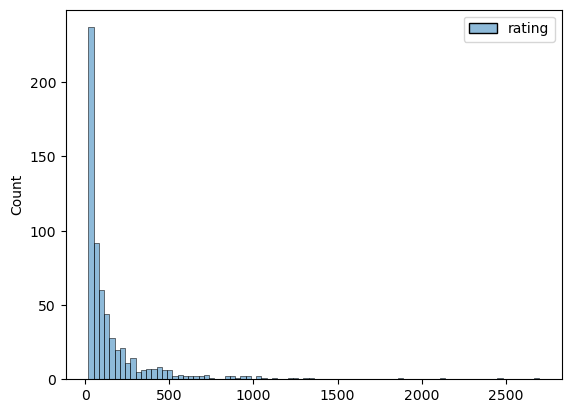

In [13]:
sns.histplot(data=total_df)

#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [14]:
ratings.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [15]:
duplicates = movies[movies.duplicated(['title'])]
duplicates

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [16]:
shared = movies[~movies.movieId.isin(ratings.movieId)]
shared

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


#### ⭐Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [17]:
movies['year'] = movies.title.str[-5:-1]
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [18]:
movies['title'] = movies.title.str[:-7]

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [19]:
combined = pd.merge(left=movies, right=ratings)

In [21]:
combined = combined[['title', 'userId','rating']]

In [22]:
pivoted = pd.pivot_table(combined, index='userId', columns='title', values='rating')

In [27]:
#pivoted.to_csv('user_ratings.csv')

#### Count the number of ratings per movie title!

In [28]:
pivoted.count()

title
                                       3
'71                                    1
'Hellboy': The Seeds of Creation       1
'Round Midnight                        2
'Salem's Lot                           1
                                      ..
eXistenZ                              22
xXx                                   24
xXx: State of the Union                5
¡Three Amigos!                        26
À nous la liberté (Freedom for Us)     1
Length: 9445, dtype: int64

#### Use your previous results: What are the top 10 most rated movies in the dataset?

In [29]:
pivoted.count().sort_values(ascending=True).head(8839)

title
À nous la liberté (Freedom for Us)                                                            1
Rebound                                                                                       1
Fighting Temptations, The                                                                     1
Films to Keep You Awake: The Christmas Tale (Películas para no dormir: Cuento de navidad)     1
Final Analysis                                                                                1
                                                                                             ..
Glory                                                                                        41
Star Wars: Episode VII - The Force Awakens                                                   41
Cars                                                                                         41
Knight's Tale, A                                                                             41
Gremlins                          

#### Calculate the average rating per movie title!

#### Which movie was rated the best? Which movie was rated the worst?

- ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? 

In [30]:
nan_cols85 = [i for i in pivoted.columns if pivoted[i].isnull().sum() > 0.85*len(pivoted)]

In [31]:
nan_cols85

['',
 "'71",
 "'Hellboy': The Seeds of Creation",
 "'Round Midnight",
 "'Salem's Lot",
 "'Til There Was You",
 "'Tis the Season for Love",
 "'burbs, The",
 "'night Mother",
 '(500) Days of Summer',
 '*batteries not included',
 '...All the Marbles',
 '...And Justice for All',
 '00 Schneider - Jagd auf Nihil Baxter',
 '1-900 (06)',
 '10',
 '10 Cent Pistol',
 '10 Cloverfield Lane',
 '10 Items or Less',
 '10 Things I Hate About You',
 '10 Years',
 '10,000 BC',
 '100 Girls',
 '100 Streets',
 '101 Dalmatians',
 '101 Dalmatians (One Hundred and One Dalmatians)',
 "101 Dalmatians II: Patch's London Adventure",
 '101 Reykjavik (101 Reykjavík)',
 '102 Dalmatians',
 '10th & Wolf',
 '10th Kingdom, The',
 '10th Victim, The (La decima vittima)',
 '11\'09"01 - September 11',
 '11:14',
 '11th Hour, The',
 '12 Angry Men',
 '12 Chairs',
 '12 Rounds',
 '12 Years a Slave',
 '127 Hours',
 '13 Assassins (Jûsan-nin no shikaku)',
 '13 Ghosts',
 '13 Going on 30',
 '13 Hours',
 '13 Sins',
 '13 Tzameti',
 '13th'

In [32]:
df_pivot = pivoted.drop(nan_cols85, axis=1)

In [33]:
df_pivot

title,2001: A Space Odyssey,Ace Ventura: Pet Detective,Aladdin,Alien,Aliens,"Amelie (Fabuleux destin d'Amélie Poulain, Le)",American Beauty,American History X,American Pie,Apocalypse Now,...,Up,"Usual Suspects, The",V for Vendetta,WALL·E,Waterworld,While You Were Sleeping,Who Framed Roger Rabbit?,Willy Wonka & the Chocolate Factory,"Wizard of Oz, The",X-Men
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,5.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,5.0,NaN,NaN,4.0,3.5,4.5,4.5,4.0,1.0,4.5,...,NaN,4.5,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN
607,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0
608,3.0,3.5,3.0,4.0,4.5,NaN,5.0,4.0,2.5,3.0,...,NaN,4.5,4.0,NaN,3.0,2.5,3.0,3.5,2.5,4.0


In [34]:
df_pivot.mean().sort_values(ascending=False)

title
Shawshank Redemption, The                                               4.429022
Godfather, The                                                          4.289062
Fight Club                                                              4.272936
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb    4.268041
Godfather: Part II, The                                                 4.259690
                                                                          ...   
Net, The                                                                3.040179
Cliffhanger                                                             3.034653
Home Alone                                                              2.995690
Batman Forever                                                          2.916058
Waterworld                                                              2.913043
Length: 163, dtype: float64

In [35]:
#df_pivot.to_csv('less_user_ratings.csv')

In [36]:
cos_df = df_pivot.T

In [37]:
cos_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,NaN,3.0,NaN,4.5
Ace Ventura: Pet Detective,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.5,NaN,3.0
Aladdin,NaN,NaN,NaN,4.0,4.0,5.0,3.0,NaN,NaN,4.0,...,NaN,NaN,NaN,3.0,3.5,NaN,NaN,3.0,NaN,NaN
Alien,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,4.0,3.0,4.0,NaN,4.5
Aliens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.5,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
While You Were Sleeping,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,...,NaN,3.0,3.0,3.0,NaN,NaN,NaN,2.5,3.0,NaN
Who Framed Roger Rabbit?,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN
Willy Wonka & the Chocolate Factory,5.0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,4.0,NaN,NaN,3.5,NaN,NaN


In [38]:
cos_df.to_csv('cosine_sim.csv')